In [102]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [104]:
pip install plotly

In [105]:
##Load EDA packages
import pandas as pd
import numpy as np

##Load data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

#Visualize missing values
import missingno as msno

#Find most common words using wordcloud 
from wordcloud import WordCloud

#map and other location lib
import folium
from folium import Marker
from folium.plugins import MarkerCluster

In [106]:
#data is taken from Global health, platform enabling open access to real-time epidemiological anonymized line-list data.
data_url = "https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv"

In [107]:
#Load dataset
df=pd.read_csv(data_url)

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (14,18,21,24,34) have mixed types.Specify dtype option on import or set low_memory=False.



In [108]:
df.head()

ID     Status                             Location    City  Country  \
0  N1  confirmed  Guy's and St Thomas Hospital London  London  England   
1  N2  confirmed  Guy's and St Thomas Hospital London  London  England   
2  N3  confirmed                               London  London  England   
3  N4  confirmed                               London  London  England   
4  N5  confirmed                               London  London  England   

  Country_ISO3  Age Gender  Date_onset Date_confirmation  ...  \
0          GBR  NaN    NaN  2022-04-29        2022-05-06  ...   
1          GBR  NaN    NaN  2022-05-05        2022-05-12  ...   
2          GBR  NaN    NaN  2022-04-30        2022-05-13  ...   
3          GBR  NaN   male         NaN        2022-05-15  ...   
4          GBR  NaN   male         NaN        2022-05-15  ...   

                                              Source  \
0  https://www.gov.uk/government/news/monkeypox-c...   
1  https://www.gov.uk/government/news/monkeypox-c...   
2  https://www.gov.uk/government/news/monkeypox-c...   
3  https://www.gov.uk/government/news/monkeypox-c...   
4  https://www.gov.uk/government/news/monkeypox-c...   

                                           Source_II Source_III Source_IV  \
0  https://www.who.int/emergencies/disease-outbre...        NaN       NaN   
1                                                NaN        NaN       NaN   
2                                                NaN        NaN       NaN   
3                                                NaN        NaN       NaN   
4                                                NaN        NaN       NaN   

  Source_V Source_VI Source_VII  Date_entry Date_death Date_last_modified  
0      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
1      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
2      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
3      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  
4      NaN       NaN        NaN  2022-05-18        NaN         2022-05-18  

[5 rows x 36 columns]

In [109]:
#shape
df.shape

(30637, 36)

# Dataset has 30637 rows and 36 columns.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30637 entries, 0 to 30636
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       30637 non-null  object 
 1   Status                   30637 non-null  object 
 2   Location                 20412 non-null  object 
 3   City                     1100 non-null   object 
 4   Country                  30637 non-null  object 
 5   Country_ISO3             30637 non-null  object 
 6   Age                      2466 non-null   object 
 7   Gender                   1893 non-null   object 
 8   Date_onset               51 non-null     object 
 9   Date_confirmation        27865 non-null  object 
 10  Symptoms                 190 non-null    object 
 11  Hospitalised (Y/N/NA)    243 non-null    object 
 12  Date_hospitalisation     31 non-null     object 
 13  Isolated (Y/N/NA)        394 non-null    object 
 14  Date_isolation        

In [112]:
#Datatypes
df.dtypes

ID                          object
Status                      object
Location                    object
City                        object
Country                     object
Country_ISO3                object
Age                         object
Gender                      object
Date_onset                  object
Date_confirmation           object
Symptoms                    object
Hospitalised (Y/N/NA)       object
Date_hospitalisation        object
Isolated (Y/N/NA)           object
Date_isolation              object
Outcome                     object
Contact_comment             object
Contact_ID                 float64
Contact_location            object
Travel_history (Y/N/NA)     object
Travel_history_entry        object
Travel_history_start        object
Travel_history_location     object
Travel_history_country      object
Genomics_Metadata           object
Confirmation_method         object
Source                      object
Source_II                   object
Source_III          

In [113]:
#columns
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_death',
       'Date_last_modified'],
      dtype='object')

## EDA

# Distribution of cases per location:Country, City

In [115]:
#How many countries in our dataset
df['Country'].unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

In [116]:
#Number of Countries
len(df['Country'].unique())

110

# Distribution per country
# Confirmed/Suspected etc

In [117]:
df['Country'].value_counts()

United States                       7324
Spain                               5128
Germany                             2887
England                             2551
Democratic Republic Of The Congo    2266
                                    ... 
Cyprus                                 1
Malawi                                 1
Montenegro                             1
Haiti                                  1
Barbados                               1
Name: Country, Length: 110, dtype: int64

# Visualization of Distribution Per Country : Cases per county

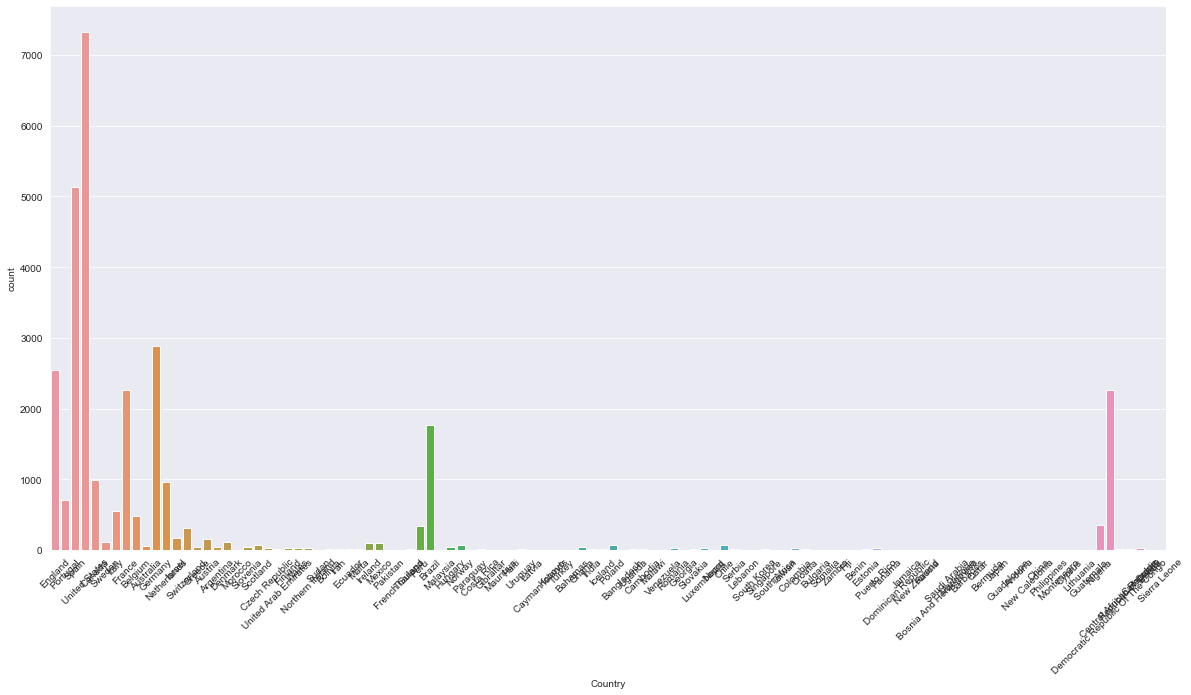

In [118]:
plt.figure(figsize=(20,10))
sns.countplot(x='Country',data=df)
plt.xticks(rotation=45)
plt.show()

In [119]:
cases_per_country = df.groupby('Country')['Status'].count().reset_index()

In [120]:
cases_per_country['Status'].nlargest()

105    7324
96     5128
37     2887
30     2551
26     2266
Name: Status, dtype: int64

# Top Countries Affected: With Reported Cases
# 1st column shows the rank, 2nd shows the country, 3rd shows the no. of affected cases

In [121]:
cases_per_country.nlargest(n=10,columns='Status')

Country  Status
105                     United States    7324
96                              Spain    5128
37                            Germany    2887
30                            England    2551
26   Democratic Republic Of The Congo    2266
34                             France    2255
12                             Brazil    1760
16                             Canada     985
68                        Netherlands     957
80                           Portugal     710

# Most affected country as per till today's data is United States.

In [123]:
#Plot
fig = px.bar(cases_per_country,x='Country',y='Status',color='Country')
fig.show()

# Above plot shows that US has the highest number of monkeypox cases reported.

# Below show which cities in the Top Reported Countries have the Most cases
# United States

In [170]:
df[df['Country'] == 'United States'].groupby('City')['Status'].count()

City
Anchorage         1
Austin            1
Boston            1
Chicago           7
Cincinnati        2
Cleveland         1
Dallas            1
Denver            1
Forest Park       1
Houston           2
Kansas City       2
Louisville        2
Milwaukee         1
Nashville         3
Philadelphia      2
Sacramento        1
San Francisco    20
San Francsico    16
St. Louis         1
Washington DC     1
Name: Status, dtype: int64

# Which cities in the Top Reported Countries have the Most cases
# Germany

In [125]:
df[df['Country'] == 'Germany'].groupby('City')['Status'].count()

City
Aachen              1
Ansbach             1
Berlin             48
Bonn                1
Brandenburg         1
Coesfeld            1
Cologne             3
Dusseldorf          4
Frankfurt           1
Günzburg            1
Halle               1
Hamburg             2
Havelland           1
Hilden              1
Jerichower Land     1
Köln (Cologne)      2
Monheim             2
Munich              2
Münster             1
Ortenaukreis        2
Potsdam             1
Name: Status, dtype: int64

# Which cities in the Top Reported Countries have the Most cases
# England

In [126]:
df[df['Country'] == 'England'].groupby('City').count() #size=count

ID  Status  Location  Country  Country_ISO3  Age  Gender  \
City                                                                   
London       7       7         7        7             7    0       3   
Newcastle    1       1         1        1             1    0       1   
South East   1       1         1        1             1    0       0   

            Date_onset  Date_confirmation  Symptoms  ...  Source  Source_II  \
City                                                 ...                      
London               3                  7         6  ...       7          1   
Newcastle            0                  1         1  ...       1          0   
South East           0                  1         0  ...       1          0   

            Source_III  Source_IV  Source_V  Source_VI  Source_VII  \
City                                                                 
London               0          0         0          0           0   
Newcastle            0          0         0          0           0   
South East           0          0         0          0           0   

            Date_entry  Date_death  Date_last_modified  
City                                                    
London               7           0                   7  
Newcastle            1           0                   1  
South East           1           0                   1  

[3 rows x 35 columns]

# Which cities have the most cases
# Method 1

In [127]:
df.groupby('City')['Status'].count()

City
Aachen           1
Almeria          3
Anchorage        1
Ancona           1
Ansbach          1
                ..
Washington DC    1
Windsor          2
Windsor-Essex    1
York             3
île-de-France    3
Name: Status, Length: 186, dtype: int64

# Method 2

In [171]:
df['City'].value_counts()

Toronto       390
Madrid        121
Montreal       63
Berlin         48
Ottawa         35
             ... 
Sacramento      1
Blumenau        1
Sukkur          1
Marica          1
Macae           1
Name: City, Length: 186, dtype: int64

In [172]:
fig = px.bar(df,x=df['City'].value_counts().nlargest(15).index,y=df['City'].value_counts().nlargest(15),
            color=df['City'].value_counts().nlargest(15),title="Top Cities Which have Highest Numbers of Cases")
fig.update_xaxes(title_text='Cities')
fig.update_yaxes(title_text='Numbers of Cases')
fig.show()

# Toronto is the city having the highest number of monkeypox cases

In [130]:
#Confirmed Cases
df['Status']

0        confirmed
1        confirmed
2        confirmed
3        confirmed
4        confirmed
           ...    
30632    suspected
30633    suspected
30634    suspected
30635    suspected
30636    confirmed
Name: Status, Length: 30637, dtype: object

# Status Distribution

<AxesSubplot:xlabel='Status', ylabel='count'>

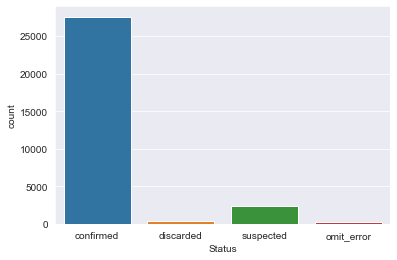

In [131]:
sns.countplot(x='Status',data=df)

# How many different status per each country

In [132]:
df.groupby(['Status','Country']).size()

Status     Country  
confirmed  Andorra        3
           Argentina     32
           Australia     54
           Austria      160
           Barbados       1
                       ... 
suspected  Somalia        3
           Sudan          1
           Uganda         6
           Uruguay        1
           Zambia         1
Length: 151, dtype: int64

# Get status of reported cases per country

In [173]:
df['Country'].value_counts().to_frame().nlargest(10,'Country')

Country
United States                        7324
Spain                                5128
Germany                              2887
England                              2551
Democratic Republic Of The Congo     2266
France                               2255
Brazil                               1760
Canada                                985
Netherlands                           957
Portugal                              710

In [134]:
top_reported_countries = list(df['Country'].value_counts().to_frame().nlargest(10,'Country').index)

# Top 10 most affected countries

In [174]:
top_reported_countries

['United States',
 'Spain',
 'Germany',
 'England',
 'Democratic Republic Of The Congo',
 'France',
 'Brazil',
 'Canada',
 'Netherlands',
 'Portugal']

In [175]:
top_counties_df = df[df['Country'].isin(top_reported_countries)]

<Figure size 1440x720 with 0 Axes>

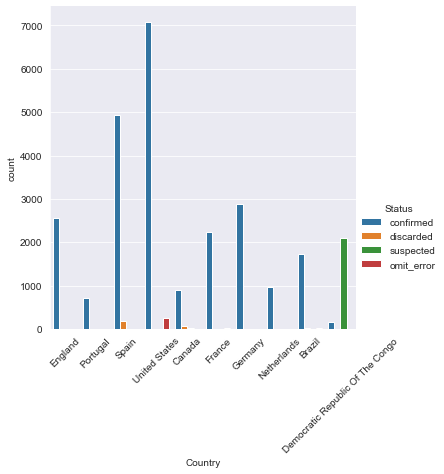

In [176]:
plt.figure(figsize=(20,10))
sns.catplot(data = top_counties_df, kind = 'count',x='Country', hue = 'Status')
plt.xticks(rotation=45)
plt.show()

# Frequency of reported Symptoms /Signs

# What are the symptoms reported

In [139]:
df['Symptoms'].unique()

array(['rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions', nan, 'oral and genital ulcers, fever',
       'lesions', 'perianal papules; inguinal adenopathy',
       'genital ulcers', 'genital rash',
       'Slight swallowing difficulties and an elevated temperature',
       'fever, rash', 'skin rashes', 'fever, lesions', 'pustules, fever',
       'skin lesions', 'fever, cough, skin lesions',
       'fever, pustules on hands, body pains', 'blisters, high fever',
       'genital ulcer lesions', 'muscle aches, fever, skin lesions',
       'blisters', 'fever, skin lesions',
       'erythema with vesicles and papules, difficulty breathing, headache, fever',
       'skin lesions, spots on skin, severe anemia',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'fever, fatigue, headache, muscle pain',
       'skin rashes, dysphagia, muscle pain, fever, decreased physical strength, enlarged lymph nodes',
       'fever, outbreak on the sk

# Frequency : Most Common symptoms/signs

In [140]:
docx = ' '.join(df['Symptoms'].fillna('0').to_list())#fill nan values will '0' sine this confidential part of the data

In [141]:
def plot_wordcloud(text):
    mywordcloud = WordCloud().generate(text)
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show(block=True)

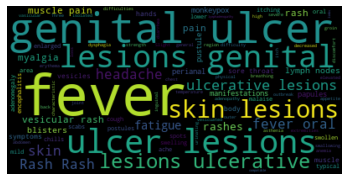

In [142]:
plot_wordcloud(docx)

# genital ulcer lesions is very common for monkeypox. ulcer, lesions, fever, genital lesions are also visible 

In [144]:
fig = px.pie(df, values=df['Symptoms'].value_counts().nlargest(10), names=df['Symptoms'].value_counts().nlargest(10).index
             , title='10 Common Symptoms',hole = .65)
fig.show()

# World Map Cases Distribution

In [146]:
df2 = df[['Country_ISO3','ID']].groupby('Country_ISO3').agg('count').reset_index()
df2.rename({'ID':'Total'}, axis = 1, inplace = True)

In [147]:
fig = px.scatter_geo(df2, locations="Country_ISO3", 
                     color="Total",
                     hover_name="Country_ISO3", 
                     size="Total",
                     title = 'Distribution of Confirmed Cases using Bubble Maps',
                     projection="natural earth",
                     color_continuous_scale =px.colors.sequential.Rainbow
                    )
fig.show()

# The affected countries are shown using colour bubbles in the world map.

In [148]:
fig = px.choropleth(df2,
                    locations = "Country_ISO3",
                    color = "Total",
                    hover_name = "Country_ISO3",
                    color_continuous_scale =px.colors.sequential.Rainbow,
                    template = 'plotly_dark',
                    title = 'Distribution of Confirmed Cases World Map',
                    height = 600,
                    width = 1000,
                   )
fig.show()

In [149]:
from collections import Counter

In [150]:
word_freq = Counter(docx.split())

In [151]:
word_freq.most_common(10)

[('0', 30447),
 ('lesions', 73),
 ('genital', 53),
 ('skin', 40),
 ('fever', 34),
 ('fever,', 32),
 ('ulcer', 30),
 ('and', 25),
 ('ulcerative', 21),
 ('rash', 20)]

# No of cases per day/time series

In [153]:
df.columns

Index(['ID', 'Status', 'Location', 'City', 'Country', 'Country_ISO3', 'Age',
       'Gender', 'Date_onset', 'Date_confirmation', 'Symptoms',
       'Hospitalised (Y/N/NA)', 'Date_hospitalisation', 'Isolated (Y/N/NA)',
       'Date_isolation', 'Outcome', 'Contact_comment', 'Contact_ID',
       'Contact_location', 'Travel_history (Y/N/NA)', 'Travel_history_entry',
       'Travel_history_start', 'Travel_history_location',
       'Travel_history_country', 'Genomics_Metadata', 'Confirmation_method',
       'Source', 'Source_II', 'Source_III', 'Source_IV', 'Source_V',
       'Source_VI', 'Source_VII', 'Date_entry', 'Date_death',
       'Date_last_modified'],
      dtype='object')

# dates on which monkeypox cases are reported

In [154]:
pd.to_datetime(df['Date_confirmation'])

0       2022-05-06
1       2022-05-12
2       2022-05-13
3       2022-05-15
4       2022-05-15
           ...    
30632          NaT
30633          NaT
30634          NaT
30635          NaT
30636   2022-07-23
Name: Date_confirmation, Length: 30637, dtype: datetime64[ns]

In [155]:
df1 = df[['Date_confirmation','ID']].groupby('Date_confirmation').agg('count').reset_index()
df1['Accumulated Cases'] = df1['ID'].cumsum()
df1.rename({'ID':'Count'}, axis = 1, inplace = True)

In [156]:
fig = px.line(df1,x='Date_confirmation',y='Accumulated Cases',markers=True,title='Daily Cases Updates')
fig.show()

# Above plot shows that monkeypox cases increased rapidly starting from the month of june eventhouh the first outbreak was reported in early May 2022

# Check Distribution Per Time/Number of cases per day based on date confirmation was made(Visualization)

Text(0.5, 1.0, 'Number of smallpox casesv detected per day')

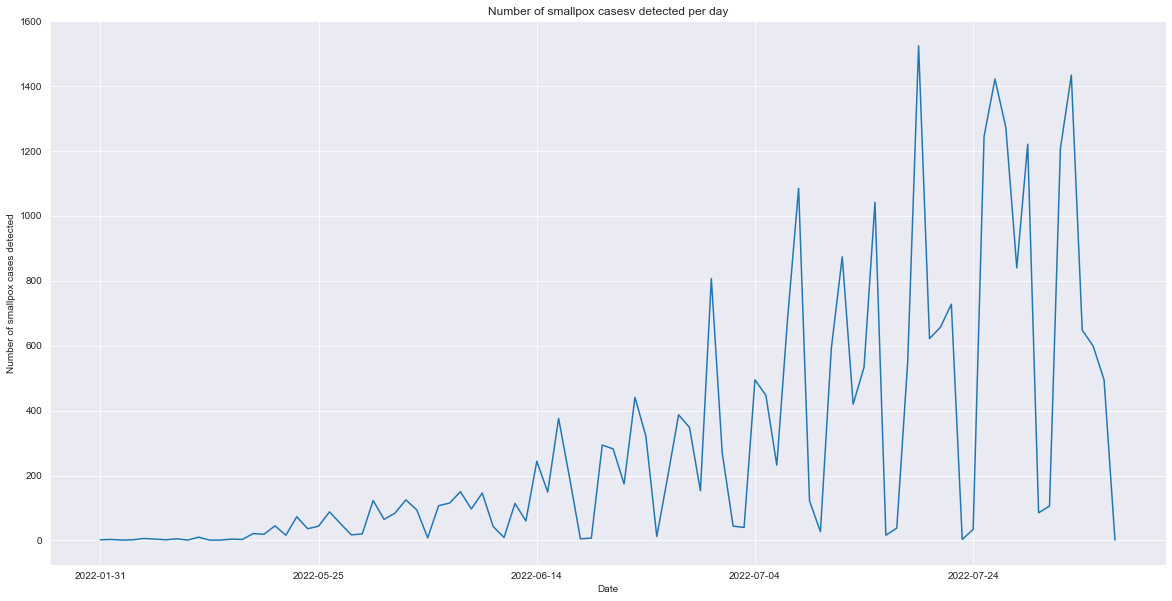

In [157]:
plt.figure(figsize=(20,10))
df.groupby('Date_confirmation')['Status'].size().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of smallpox cases detected')
plt.title('Number of smallpox casesv detected per day')

# It is clear that the trend of monkeypox is increasing and many new cases are reported everyday.

# Day/Weekend or Week
# which day of the week has the highest confirmation and onset
# Useful for knowing what activity was done before (weekend,weekday)

In [159]:
pd.to_datetime(df['Date_confirmation']).dt.day_name().value_counts()

Tuesday      6831
Friday       5593
Thursday     5330
Monday       5146
Wednesday    3916
Sunday        707
Saturday      342
Name: Date_confirmation, dtype: int64

# Weekdays have the highest date of confirmation because most people don't go to hospitals during weekdays. That is why weekends have less confirmations because  people go to hospitals during weekends.

<AxesSubplot:>

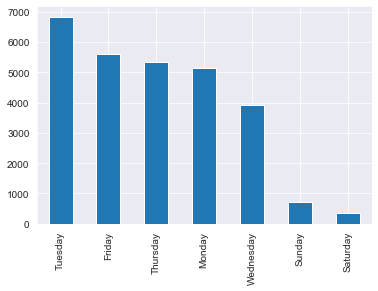

In [161]:
# which day of the week has the highest confirmation and onset
# Useful for knowing what activity was done before (weekend,weekday)
pd.to_datetime(df['Date_confirmation']).dt.day_name().value_counts().plot(kind='bar')

In [162]:
# which day of the week has the highest confirmation and onset
# Useful for knowing what activity was done before (weekend,weekday)
pd.to_datetime(df['Date_onset']).dt.day_name().value_counts()

Thursday     11
Tuesday      10
Friday        9
Sunday        7
Saturday      6
Monday        4
Wednesday     4
Name: Date_onset, dtype: int64

# Most people had the onset of monkeypox on Tuesdays.

In [164]:
# which day of the week has the highest confirmation and onset
# Useful for knowing what activity was done before (weekend,weekday)
pd.to_datetime(df['Date_entry']).dt.day_name().value_counts()

Friday       8314
Tuesday      7504
Wednesday    5456
Thursday     4732
Monday       4296
Saturday      175
Sunday        160
Name: Date_entry, dtype: int64

<AxesSubplot:>

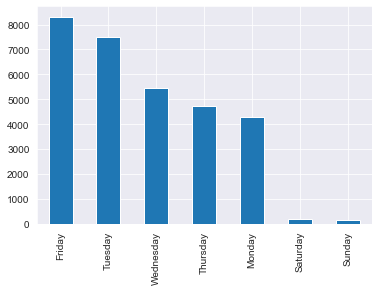

In [165]:
# which day of the week has the highest confirmation and onset
# Useful for knowing what activity was done before (weekend,weekday)
pd.to_datetime(df['Date_entry']).dt.day_name().value_counts().plot(kind='bar')

# Above shows that most people  go to hospitals on Friday

In [167]:
fig = px.bar(df,x=df['Confirmation_method'].value_counts().index,y=df['Confirmation_method'].value_counts(),
            color=df['Confirmation_method'].value_counts().nlargest(15),title="Testing Kit Type Used")
fig.update_xaxes(title_text='Test Kit')
fig.update_yaxes(title_text='Numbers of Cases Count')
fig.show()

# Compared with other diagnostic methods, real-time RT-PCR has the advantages of fast, high-quantity throughput and increased sensitivity.